In [1]:
# lets start with importing necessary library
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels as sm
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.decomposition import PCA
import scikitplot as skplt
import matplotlib.pyplot as plt    
import seaborn as sns
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string
import pickle
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import warnings
warnings.filterwarnings("ignore")

In [2]:
 import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
pip install ntlk

  Using cached ntlk-1.0.3.tar.gz (8.0 kB)
  Running setup.py clean for ntlk
Failed to build ntlk
    Running setup.py install for ntlk: started
    Running setup.py install for ntlk: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\INPshy\Anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\INPshy\\AppData\\Local\\Temp\\pip-install-bqqv4gbl\\ntlk\\setup.py'"'"'; __file__='"'"'C:\\Users\\INPshy\\AppData\\Local\\Temp\\pip-install-bqqv4gbl\\ntlk\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\INPshy\AppData\Local\Temp\pip-wheel-glx9b0yx'
       cwd: C:\Users\INPshy\AppData\Local\Temp\pip-install-bqqv4gbl\ntlk\
  Complete output (13 lines):
  running bdist_wheel
  running build
  installing to build\bdist.win-amd64\wheel
  running install
  
  You probably meant to install NLTK (the Natural Language Toolkit).
  You have attempted to install NTLK instead. This is an empty package
  to help prevent typosquatting. To install NLTK, try this instead:
  pip instal

In [4]:
data=pd.read_csv(r"C:\Users\INPshy\Desktop\DATA Science\Maling comment\train.csv")
data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
data.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


basically where comment is highly malignant ,rude,threat ,abuse,loathe mark 1 ,if not mark 0

In [4]:
data.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

good there is no null values in this data set

In [5]:
#check & add comment string length
data['length'] = data['comment_text'].str.len()
data.head(5)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
 8   length            159571 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 11.0+ MB
None


Id and comment are object and rest malignant ,rude highly_malignant, threat,abuse, loathe ,length are int type data

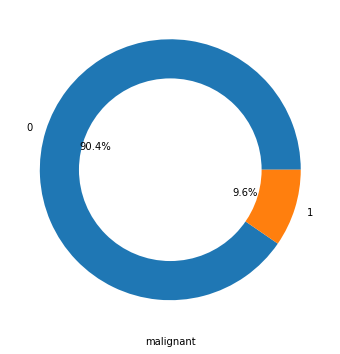

<Figure size 432x288 with 0 Axes>

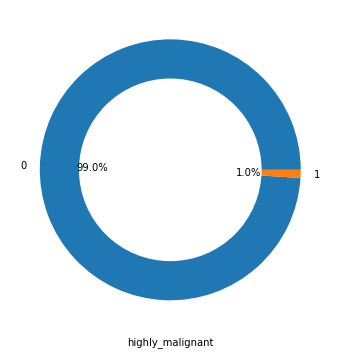

<Figure size 432x288 with 0 Axes>

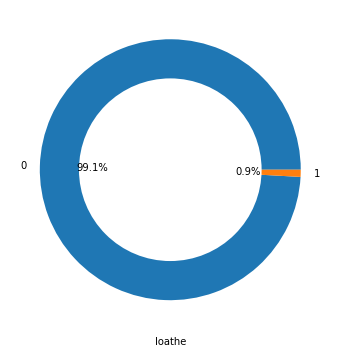

<Figure size 432x288 with 0 Axes>

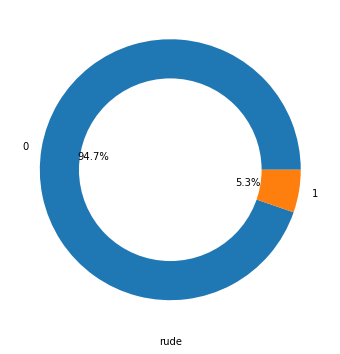

<Figure size 432x288 with 0 Axes>

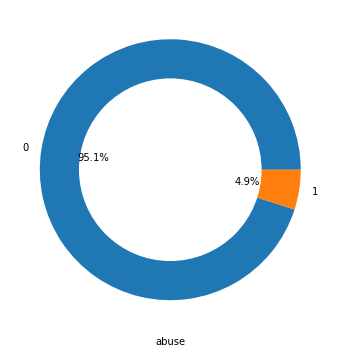

<Figure size 432x288 with 0 Axes>

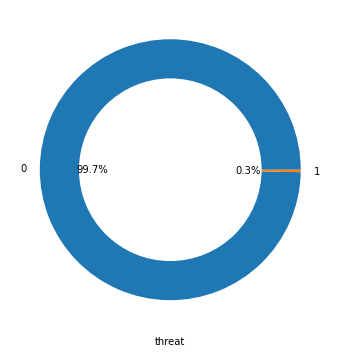

<Figure size 432x288 with 0 Axes>

In [7]:
#% wise pie chart analysis of comment categories
col=data[['malignant','highly_malignant','loathe','rude','abuse','threat']]
for i in col:
    
    plt.figure(figsize=(8,6))
    data[i].value_counts().plot.pie(autopct='%1.1f%%')
    centre=plt.Circle((0,0),0.7,fc='white')
    fig=plt.gcf()
    fig.gca().add_artist(centre)
    plt.xlabel(i)
    plt.ylabel('')
    plt.figure()

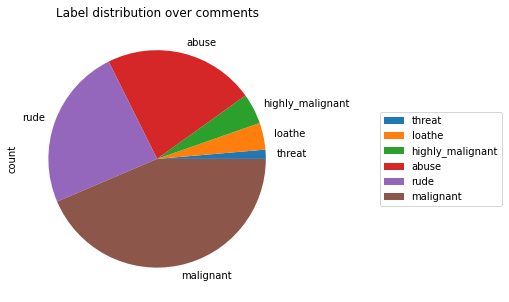

In [8]:
#comment categorization

column = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = data[column].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

                  malignant  highly_malignant      rude    threat     abuse  \
malignant          1.000000          0.308619  0.676515  0.157058  0.647518   
highly_malignant   0.308619          1.000000  0.403014  0.123601  0.375807   
rude               0.676515          0.403014  1.000000  0.141179  0.741272   
threat             0.157058          0.123601  0.141179  1.000000  0.150022   
abuse              0.647518          0.375807  0.741272  0.150022  1.000000   
loathe             0.266009          0.201600  0.286867  0.115128  0.337736   
length            -0.054413          0.010175 -0.042910 -0.007917 -0.045027   

                    loathe    length  
malignant         0.266009 -0.054413  
highly_malignant  0.201600  0.010175  
rude              0.286867 -0.042910  
threat            0.115128 -0.007917  
abuse             0.337736 -0.045027  
loathe            1.000000 -0.013628  
length           -0.013628  1.000000  
AxesSubplot(0.125,0.125;0.62x0.755)


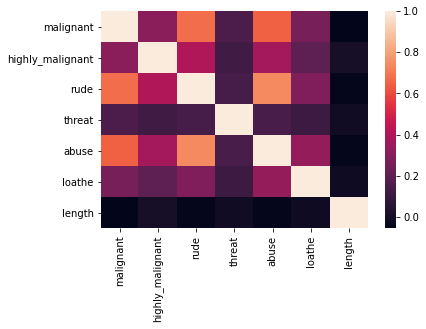

In [9]:
# check correlation in dataset
print(data.corr())
print(sns.heatmap(data.corr()))

in this dataset malignant,highly malignant ,rude ,threat ,abuse are having correltaion 

In [10]:
data['length'] = data['comment_text'].str.len()
data.head(2)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112


In [11]:
#comment text cleaning as many / n & so many special charecter present in comments 
# Convert all messages to lower case
data['comment_text'] = data['comment_text'].str.lower()

# Replace email addresses with 'email'
data['comment_text'] = data['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
data['comment_text'] = data['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymbol
data['comment_text'] = data['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace  phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
data['comment_text'] = data['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
data['comment_text'] = data['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')


data['comment_text'] = data['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
data['comment_text'] = data['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
data['comment_text'] = data['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

<AxesSubplot:title={'center':'correlation with target'}>

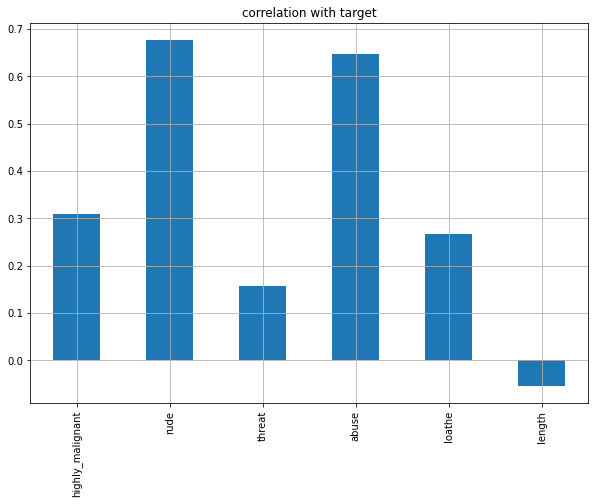

In [12]:
#take same data and visualize the correlation with class 
data.drop('malignant',axis=1).corrwith(data.malignant).plot(kind='bar',grid=True,figsize=(10,7),
                                                 title='correlation with target')

its good that all features show positive and strong relation with target variable

In [13]:
column = ['malignant','highly_malignant','rude','threat','abuse','loathe']
target_data = data[column]

data['bad'] =data[column].sum(axis =1)
print(data['bad'].value_counts())
data['bad'] = data['bad'] > 0 
data['bad'] = data['bad'].astype(int)
print(data['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


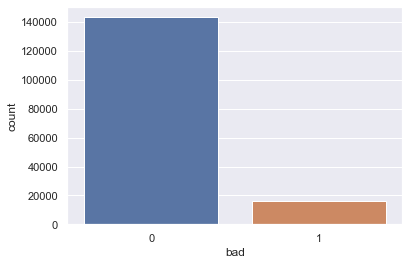

In [14]:
sns.set()
sns.countplot(x="bad" , data = data)
plt.show()

In [15]:
data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,bad
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,0
1,000103f0d9cfb60f,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0,112,0
2,000113f07ec002fd,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,233,0
3,0001b41b1c6bb37e,can't make real suggestion improvement wondere...,0,0,0,0,0,0,622,0
4,0001d958c54c6e35,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,67,0


In [16]:
#check skewness in dataset
data.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
length               4.121676
bad                  2.635944
dtype: float64

In [17]:
pip install wordcloud

In [18]:
data['clean_length'] = data.comment_text.str.len()
data.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,bad,clean_length
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,0,180
1,000103f0d9cfb60f,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0,112,0,111
2,000113f07ec002fd,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,233,0,149
3,0001b41b1c6bb37e,can't make real suggestion improvement wondere...,0,0,0,0,0,0,622,0,397
4,0001d958c54c6e35,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,67,0,47


In [19]:
# Total length removal
print ('Origian Length', data.length.sum())
print ('Clean Length', data.clean_length.sum())

Origian Length 62893130
Clean Length 43575187


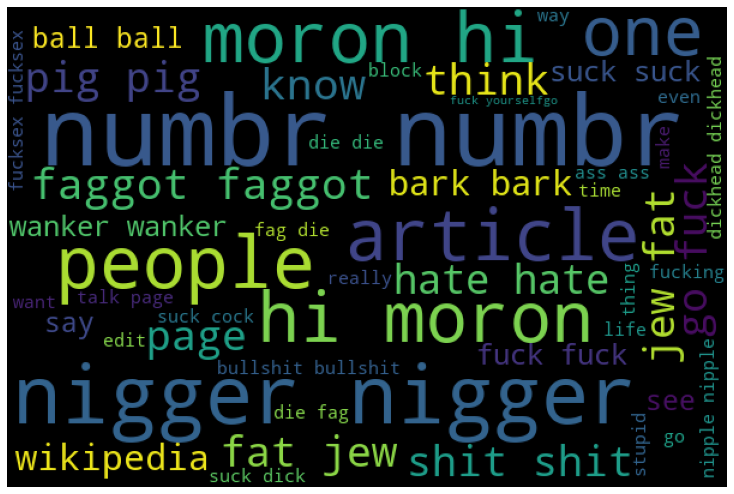

In [20]:
#fetching  absurd word of loud words which are offensive
from wordcloud import WordCloud
abuse = data['comment_text'][data['malignant']==1]
cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(abuse))
plt.figure(figsize=(10,8),facecolor='w')
plt.imshow(cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [21]:
#  Convert text into vectors using TF-IDF for word couting ,this summerize how often word repeat in given text
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = vec.fit_transform(data['comment_text'])
x = features

In [23]:
#features selection to build the model
y=data['bad']

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=12,test_size=.30)

# LogisticRegression Model

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
Logistic=LogisticRegression()
Logistic.fit(x_train,y_train)

LogisticRegression()

In [26]:
y_pred=Logistic.predict(x_train)

In [27]:
#classification report
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    100419
           1       0.94      0.63      0.76     11280

    accuracy                           0.96    111699
   macro avg       0.95      0.81      0.87    111699
weighted avg       0.96      0.96      0.96    111699



In [28]:
#modle score
Logistic.score(x_train,y_train)

0.959202857680015

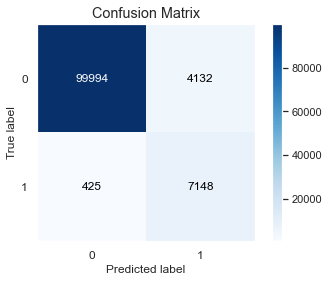

In [29]:
#confusion matrix
skplt.metrics.plot_confusion_matrix(y_pred,y_train)
plt.show()

TP=99994,Type 1 error=4132, Type 2 error= 425, TN=7148

In [30]:
from sklearn.model_selection import KFold,cross_val_score

In [31]:
cross_val_score(Logistic,x,y,cv=5).mean()

0.9560885051692514

model accuracy is good as per cross val score

# Decision Tree Model

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [98]:
y_pred=dt.predict(x_train)

In [99]:
#modle score
dt.score(x_train,y_train)

0.9986660578877161

In [100]:
#classification report
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100419
           1       1.00      0.99      0.99     11280

    accuracy                           1.00    111699
   macro avg       1.00      0.99      1.00    111699
weighted avg       1.00      1.00      1.00    111699



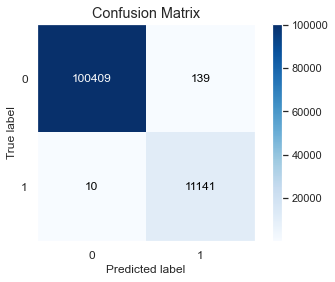

In [101]:
#confusion matrix
skplt.metrics.plot_confusion_matrix(y_pred,y_train)
plt.show()

In [104]:
cross_val_score(dt,x,y,cv=5).mean()

0.9406408461185307

so model little bit overfitted as per cross val score

# GradientBoosting Classifer Model

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [117]:
y_pred=gbc.predict(x_train)

In [109]:
#model score
gbc.score(x_train,y_train)

0.9404649996866579

In [108]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     45637
           1       0.43      0.96      0.59      2235

    accuracy                           0.94     47872
   macro avg       0.71      0.95      0.78     47872
weighted avg       0.97      0.94      0.95     47872



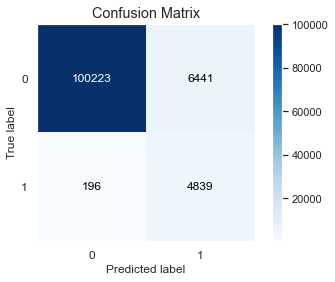

In [118]:
#confusion matrix gradient boost model
skplt.metrics.plot_confusion_matrix(y_pred,y_train)
plt.show()

# RandomForest Classifier Model

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
y_pred=rfc.predict(x_train)

In [37]:
#model score
rfc.score(x_train,y_train)

0.9987108210458464

In [39]:
print(classification_report(y_pred,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100525
           1       0.99      1.00      0.99     11174

    accuracy                           1.00    111699
   macro avg       0.99      1.00      1.00    111699
weighted avg       1.00      1.00      1.00    111699



In [40]:
#confusion matrix of Random forest 
confusion_matrix(y_pred,y_train)

array([[100400,    125],
       [    19,  11155]], dtype=int64)

In [41]:
#cross validation score
cross_val_score(rfc,x,y,cv=3).mean()

0.956376782856413

In [42]:
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import plot_roc_curve

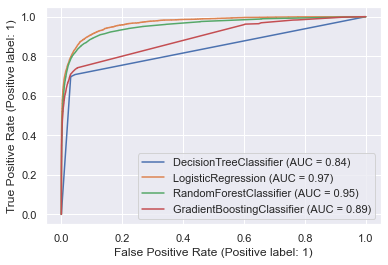

In [45]:
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(Logistic,x_test,y_test, ax=disp.ax_) #ax_ is axis with confusion matrix  ,it is way that combine other confusion mt
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

In [46]:
#saving model LogisticRegression
import pickle
file='pikle_rf_model'
with open(file ,'wb') as file:
    pickle.dump(Logistic, file) 